# E-tivity 3: Linear regression
## MSc in AI - CE6002 & CS5062
Student Name: Michel Danjou

Student ID: 18263461

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split

import pandas as pd

# Task 4  (CE6002)
  * Copy your linear classification algorithm to the notebook Etivity3_LinearRegression.ipynb available in the git repository. Change your linear classification algorithm to make it suitable for linear regression. Use this to obtain the best possible classification of the data set Task4.csv. Your classification performance should improve if you add some new features.
  
  * Also, use an algorithm from the scikit-learn toolbox to see if you can do better. You should not add any other imports than those necessary for your chosen scikit-learn algorithm.

In [2]:
# Load the data
data = pd.read_csv("Task4.csv") 

In [3]:
data.head()

,X,y
0,0.0000,-0.3080
1,0.0101,-0.3470
2,0.0202,-0.0937
3,0.0303,-0.2860
4,0.0404,-0.0927


In [4]:
data.describe()

,X,y
count,100.000000,100.000000
mean,0.499995,0.786404
std,0.293037,0.396402
min,0.000000,-0.347000
25%,0.250250,0.639750
50%,0.500000,0.928000
75%,0.749750,1.075000
max,1.000000,1.270000


In [5]:
# Plot the boundary
def decision_boundary_lin(weights, x_min, x_max):
   # Return two points on the decision boundary
   return [point_on_boundary_lin(weights, x_min), point_on_boundary_lin(weights, x_max)]

def point_on_boundary_lin(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [6]:
def linear_regression(X, y):
    
    # X = np.insert(X, 0, 1, axis=1)
    #bias = np.array([1])   
    
    #bias = np.ones(len(X))
    #X = np.concatenate(bias,X)
    
    X_inverse = np.linalg.pinv(X)
    w_lin = np.matmul(X_inverse, y)
    yhat = X.dot(w_lin)
    return w_lin, yhat


def calc_square_error(a, b):
    e_sq = 0
    N = len(a)
    for i in range(N):
        e_sq += math.pow((a[i] - b[i]),2)
    return math.sqrt(e_sq/N)


def calculate_and_plot_linear_regression(X, y):
    # Linear regression
    weights, yhat = linear_regression(X, y)
    #plt.scatter(X[:,0], X[:,1], c=y)

    minx = np.amin(X)
    maxx = np.amax(X)
    horz = np.linspace(minx, maxx, len(X))
    #vert = w_lin[0]*X + w_lin[1]
    #plt.plot(horz, X[:,0], color='red')
    #plt.plot(horz, X[:,1], color='blue')
    plt.plot(X[:,1], y, color='green')
    plt.scatter(X[:,1], y, c=y)

    # Plot
    minx = np.amin(X)
    maxx = np.amax(X)
    #miny, maxy = decision_boundary_lin(weights, minx, maxx)
    #plt.plot([minx, maxx], [miny, maxy], 'ro-')
    
    # yhat
   # plt.scatter(X[:,0], np.sign(yhat), c=y)
    
    # error
    error = calc_square_error(y,  yhat)
    
    return weights, yhat, error


(100,)
<class 'numpy.ndarray'>
(100,)
<class 'numpy.ndarray'>
(2, 100)


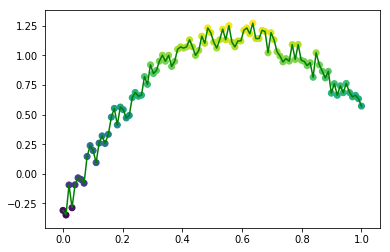

In [7]:
myX = data['X'].values
myY = data['y'].values

print(myX.shape)
print(type(myX))

bias = np.ones(len(myX))
print(bias.shape)
print(type(bias))

#newX = np.insert(X, 0, 1, axis=1)
#newX = np.concatenate((bias, myX),axis=1)
newX =  np.vstack((bias,myX))
print(newX.shape)
newXt = newX.T

#weights, yhat, error = calculate_and_plot_linear_regression(myX, myY)
weights, yhat, error = calculate_and_plot_linear_regression(newXt, myY.T)
#print("Error:", error)